In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load data
---

We'll use [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL) to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [2]:
# Load data
df = pd.read_csv('datasets/AAPL.csv')
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-13,65.282501,66.195000,65.267502,66.117500,65.019051,102734400
1,2019-11-14,65.937500,66.220001,65.525002,65.660004,64.569160,89182800
2,2019-11-15,65.919998,66.445000,65.752502,66.440002,65.336212,100206400


In [3]:
# Change date column to be datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# wow, thrilling
df['Date'].head(3)

0   2019-11-13
1   2019-11-14
2   2019-11-15
Name: Date, dtype: datetime64[ns]

## Set the `Date` column to be the index
---

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the `Date` column to be the index.

In [5]:
# Set Date to be in the index
df = df.set_index('Date')

In [6]:
# Sort the index
df = df.sort_values(by='Date')

In [7]:
# or, perhaps preferrably:
df.sort_index(inplace=True)

## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [8]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,65.282501,66.195000,65.267502,66.117500,65.019051,102734400
2019-11-14,65.937500,66.220001,65.525002,65.660004,64.569160,89182800
2019-11-15,65.919998,66.445000,65.752502,66.440002,65.336212,100206400


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,88.077569,89.351880,86.836998,88.167470,87.516497,1.535019e+08
std,20.474470,20.664364,19.884053,20.242404,20.589824,7.299684e+07
min,57.020000,57.125000,53.152500,56.092499,55.291519,2.880380e+07
25%,70.577499,71.641876,70.013752,71.164373,70.148175,1.057441e+08
50%,80.209999,80.917499,79.526249,80.218750,79.362244,1.360484e+08
75%,110.403750,112.177498,108.725002,110.274997,110.085075,1.842475e+08
max,137.589996,137.979996,130.529999,134.179993,133.948898,4.268848e+08


In [10]:
df.shape

(254, 6)

## Filtering by dates
---

Now that our `Date` column is the index, we can filter our data in unique ways. Try `df['2019']` in the cell below:

In [11]:
df.loc['2019']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,65.282501,66.195000,65.267502,66.117500,65.019051,102734400
2019-11-14,65.937500,66.220001,65.525002,65.660004,64.569160,89182800
2019-11-15,65.919998,66.445000,65.752502,66.440002,65.336212,100206400
2019-11-18,66.449997,66.857498,66.057503,66.775002,65.665634,86703200
2019-11-19,66.974998,67.000000,66.347504,66.572502,65.466507,76167200
2019-11-20,66.385002,66.519997,65.099998,65.797501,64.704376,106234400
2019-11-21,65.922501,66.002502,65.294998,65.502502,64.414268,121395200
2019-11-22,65.647499,65.794998,65.209999,65.445000,64.357727,65325200
2019-11-25,65.677498,66.610001,65.629997,66.592499,65.486168,84020400


You can also filter by month:

In [12]:
df.loc['2020-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.840042,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.122154,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.704819,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.358185,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.538239,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,76.121498,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,76.293579,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,77.923538,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,76.871323,161954400


## Resampling
---

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [13]:
min(df.index), max(df.index)

(Timestamp('2019-11-13 00:00:00'), Timestamp('2020-11-13 00:00:00'))

What if I want monthly averages? I can't use a simple `groupby()`:

In [14]:
df.groupby('Date').mean().head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,65.282501,66.195000,65.267502,66.117500,65.019051,102734400
2019-11-14,65.937500,66.220001,65.525002,65.660004,64.569160,89182800
2019-11-15,65.919998,66.445000,65.752502,66.440002,65.336212,100206400


Instead, we use `resample()`. This is another method that only works if the index is a datetime or datetime-like. Here `'M'` indicates montly resampling, but `'Q'` for 'quarter' would work too:

In [15]:
df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-30,66.164791,66.535833,65.717709,66.228959,65.128667,8.741917e+07
2019-12-31,68.847857,69.470952,68.467024,69.131428,67.982913,1.137521e+08
2020-01-31,77.792738,78.581547,77.207857,77.979048,76.683544,1.397319e+08
2020-02-29,77.578421,78.813158,76.681579,77.817631,76.667296,1.589395e+08
2020-03-31,65.268410,67.423181,63.711591,65.611023,64.674122,2.854578e+08
2020-04-30,67.952857,68.945357,67.021072,68.096547,67.124153,1.555297e+08
2020-05-31,77.221375,78.312875,76.595250,77.496376,77.024037,8.697708e+07
2020-06-30,86.135341,87.336250,85.160681,86.451590,86.147373,1.474262e+08
2020-07-31,95.417500,96.586818,94.265682,95.566250,95.229960,1.372953e+08


## Lookup challenge
---

Where can you find all the resample options?

## Rolling
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of methods for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` method with a statistical function chained to it. 

In [16]:
df.rolling(3).mean()[['Open']]

,Open
Date,
2019-11-13,NaN
2019-11-14,NaN
2019-11-15,65.713333
2019-11-18,66.102498
2019-11-19,66.448331
...,...
2020-11-09,118.923332
2020-11-10,118.123334
2020-11-11,117.746668


## Challenge
---

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

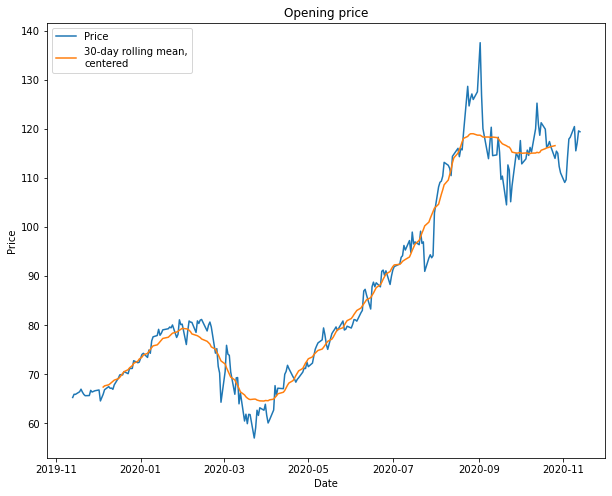

In [17]:
plt.figure(figsize=(10,8))

plt.title('Opening price')
plt.ylabel('Price')
plt.xlabel('Date')

plt.plot(df['Open'], label='Price')
plt.plot(df['Open'].rolling(30, center=True).mean(), label='30-day rolling mean,\ncentered')
plt.legend()

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


In [18]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,65.282501,66.195000,65.267502,66.117500,65.019051,102734400
2019-11-14,65.937500,66.220001,65.525002,65.660004,64.569160,89182800
2019-11-15,65.919998,66.445000,65.752502,66.440002,65.336212,100206400
2019-11-18,66.449997,66.857498,66.057503,66.775002,65.665634,86703200
2019-11-19,66.974998,67.000000,66.347504,66.572502,65.466507,76167200


In [19]:
df.diff(3).head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-18,1.167496,0.662498,0.790001,0.657502,0.646583,-16031200.0
2019-11-19,1.037498,0.779999,0.822502,0.912498,0.897347,-13015600.0
2019-11-20,0.465004,0.074997,-0.652504,-0.642501,-0.631836,6028000.0
2019-11-21,-0.527496,-0.854996,-0.762505,-1.272500,-1.251366,34692000.0
2019-11-22,-1.327499,-1.205002,-1.137505,-1.127502,-1.108780,-10842000.0
2019-11-25,-0.707504,0.090004,0.529999,0.794998,0.781792,-22214000.0


In [20]:
df.diff().diff().diff()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-18,1.220002,-0.012499,0.107501,-1.682492,-1.654573,-49102000.0
2019-11-19,-0.552499,-0.457495,-0.092501,-0.092502,-0.090919,27494000.0
...,...,...,...,...,...,...
2020-11-09,5.249992,7.660020,5.920023,2.389994,1.972963,52067400.0
2020-11-10,-8.939994,-10.400010,-2.500024,4.050008,4.255010,-108535900.0
2020-11-11,13.719993,13.630006,6.070023,1.849993,1.849993,47312800.0


In [21]:
df.diff().head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-14,0.654999,0.025001,0.2575,-0.457496,-0.449891,-13551600.0
2019-11-15,-0.017502,0.224999,0.2275,0.779998,0.767052,11023600.0


## `.pct_change()` 
---

`.pct_change()` works similar to `.diff()`, except we're calculating the difference as a change in percentage: $X_{t}/X_{t-1} - 1$

So if I have my table of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

The `.pct_change()` will look like this:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>.1</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>


We'd interpret 1-2-2019 as a 10% increase (110/100 - 1 = .10) in price from the day before. Again, the first row is a `NaN` since there is no prior row to calcuate the percent change from.

In [22]:
df.pct_change().head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-14,0.010033,0.000378,0.003945,-0.006919,-0.006919,-0.131909
2019-11-15,-0.000265,0.003398,0.003472,0.011879,0.011880,0.123607


## Challenge
---

Create three **separate** plots:
1. One for the `Close` price
2. One for the `Close` price, using `.diff()`
3. One for the `Close` price as a percent change.

What happens to your overall data when you diff?

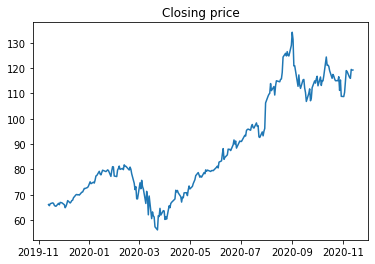

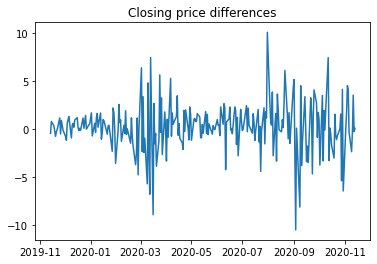

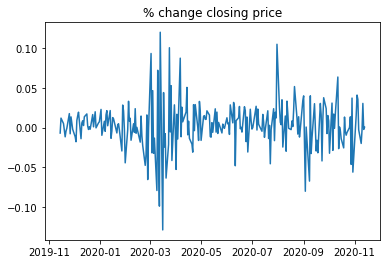

In [23]:
plt.title('Closing price')
plt.plot(df['Close'])
plt.show()

plt.title('Closing price differences')
plt.plot(df['Close'].diff())
plt.show()

plt.title('% change closing price')
plt.plot(df['Close'].pct_change())
plt.show()

[Why would we difference?](https://otexts.com/fpp2/stationarity.html) Well, there is one assumption that is **required** for nearly every time series model: **stationarity**.
- If our time series is stationary, then we do not need to difference
- If our time series is not stationary, then we difference either once (`df.diff()`) or twice (`df.diff().diff()`). Differenced data often is stationary, so we difference our data, then model that!

## What is stationarity?
---

Informally, stationarity means that there **aren't systematic changes in our time series over time**.
- Our mean stays the same. (There is no trend.)
- The autocorrelation between $Y_t$ and $Y_{t-k}$ depends only on the size of our lag $k$. (There is no seasonality.)
- A [white noise process](https://stats.stackexchange.com/questions/7070/what-is-a-white-noise-process) is a common example of a stationary time series.

The problem is, many time series **aren't** stationary.
- The amount that stock prices vary on a day-to-day basis aren't going to be the same.
- Crop prices may increase or decrease over time; assuming a constant mean here doesn't make sense.


## Shifting
---

`df.shift()` is used to bring values from previous dates forward in time.

In [24]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,65.282501,66.195000,65.267502,66.117500,65.019051,102734400
2019-11-14,65.937500,66.220001,65.525002,65.660004,64.569160,89182800
2019-11-15,65.919998,66.445000,65.752502,66.440002,65.336212,100206400


In [25]:
df.shift()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-14,65.282501,66.195000,65.267502,66.117500,65.019051,102734400.0
2019-11-15,65.937500,66.220001,65.525002,65.660004,64.569160,89182800.0
2019-11-18,65.919998,66.445000,65.752502,66.440002,65.336212,100206400.0
2019-11-19,66.449997,66.857498,66.057503,66.775002,65.665634,86703200.0
...,...,...,...,...,...,...
2020-11-09,118.320000,119.199997,116.129997,118.690002,118.690002,114457900.0
2020-11-10,120.500000,121.989998,116.050003,116.320000,116.320000,154515300.0
2020-11-11,115.550003,117.589996,114.129997,115.970001,115.970001,138023400.0


## Creating a simple dataset
---

Let's create a simple dataset that tries to predict today's `Close` price using yesterday's `Close` price with today's `Open` price. 

In [26]:
shift_df = pd.concat([
    df['Close'],
    df['Open'].shift().rename('t-1 Open'),
    df['Close'].shift().rename('t-1 Close')
], axis=1)

shift_df.corr()

,Close,t-1 Open,t-1 Close
Close,1.000000,0.988703,0.992314
t-1 Open,0.988703,1.000000,0.996092
t-1 Close,0.992314,0.996092,1.000000
